# Neural Network Classification with Scikit-Learn

This notebook demonstrates multi-class classification using the MLPClassifier from scikit-learn on the Digits dataset.

## 1. Introduction
We will build, train, and evaluate a Multi-Layer Perceptron (MLP) for digit recognition.

## 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 3. Load and Prepare Data

In [2]:
# Load Digits dataset
digits = load_digits()
X = digits.data  # each image is 8x8 flattened
y = digits.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Train MLP Classifier

In [3]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=300, random_state=42)

## 5. Evaluate Model

In [4]:
y_pred = mlp.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        55
           4       0.96      0.96      0.96        54
           5       0.98      0.98      0.98        55
           6       1.00      0.98      0.99        54
           7       0.98      1.00      0.99        54
           8       0.94      0.92      0.93        52
           9       0.98      0.98      0.98        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


Confusion Matrix:
[[53  0  0  0  1  0  0  0  0  0]
 [ 0 54  0  0  1  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 52  0  0  1  1  0]
 [ 0  0  0  0  0 5

## 6. Visualize Sample Predictions

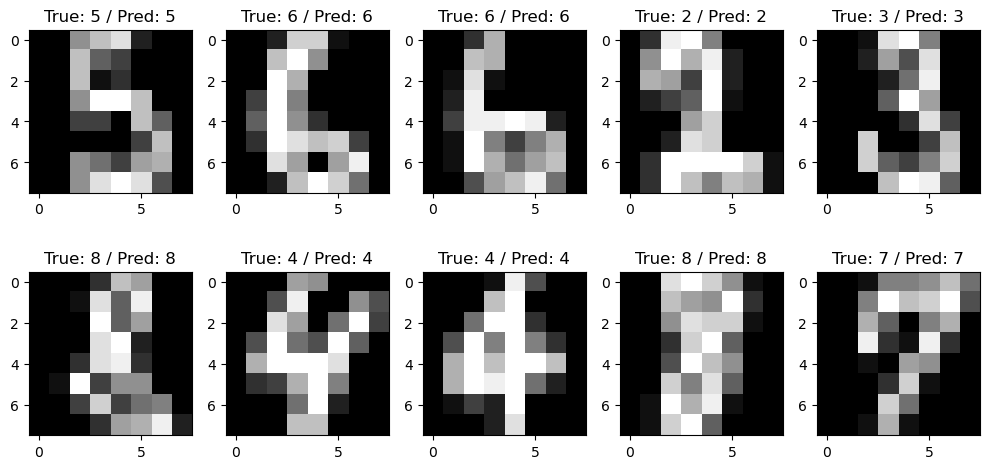

In [6]:
# Display a few test images with predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
indices = np.random.choice(len(X_test), size=10, replace=False)
for ax, idx in zip(axes.ravel(), indices):
    ax.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[idx]} / Pred: {y_pred[idx]}")
        # ax.axis('off')
plt.tight_layout()
plt.show()

## 7. Conclusion
The MLPClassifier achieved strong performance on the Digits dataset. For further improvement, tune hyperparameters or network architecture.